# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub
from joblib import Parallel, delayed
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from joblib import dump

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
# Download latest version
path = kagglehub.dataset_download("ashishg21/facebook-live-sellers-in-thailand-uci-ml-repo")

# Assuming the downloaded dataset is a CSV file
data = pd.read_csv(path + '/Live.csv')
data.head()

100%|██████████| 138k/138k [00:00<00:00, 407kB/s]

Extracting files...


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# Memahami Struktur Data
print("=== Memahami Struktur Data ===")
print("\nJumlah baris dan kolom dalam dataset:")
print(data.shape)

print("\nInformasi dataset:")
print(data.info())

print("\nJenis data di setiap kolom:")
print(data.dtypes)

print("\nPersebaran data pada kolom numerik:")
data.describe()

=== Memahami Struktur Data ===

Jumlah baris dan kolom dalam dataset:
(7050, 16)

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      f

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN



=== Cek Data yang Hilang ===

Jumlah nilai missing value setiap kolom:
status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64


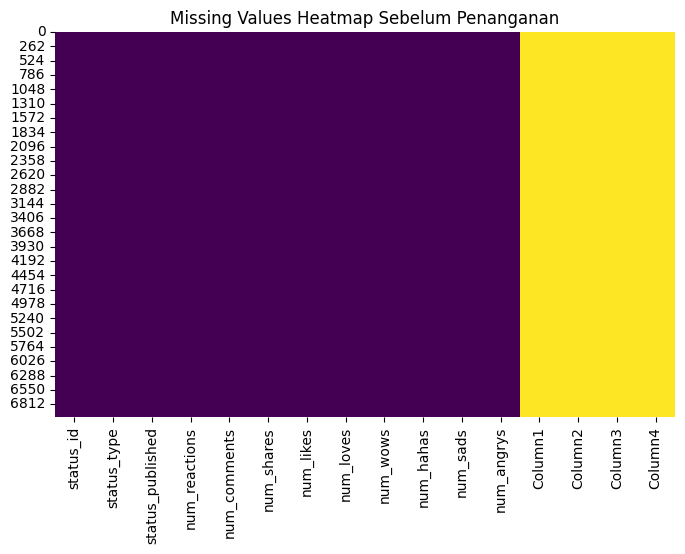

In [4]:
# Cek Data yang Hilang
print("\n=== Cek Data yang Hilang ===")
print("\nJumlah nilai missing value setiap kolom:")
print(data.isnull().sum())

# Visualisasi missing value sebelum penanganan
plt.figure(figsize=(8, 5))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap Sebelum Penanganan")
plt.show()

In [5]:
# Mengatasi Missing value
# Menghapus kolom yang memiliki banyak missing value
data.drop(columns=['Column1', 'Column2', 'Column3', 'Column4'], inplace=True)

# Cek Hasil Preprocessing
print("\n=== Hasil Preprocessing ===")
print(data.info())
print("\nJumlah missing value setelah penanganan:")
print(data.isnull().sum())


=== Hasil Preprocessing ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB
None

Jumlah missing value setelah penanganan:
status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares 

In [6]:
# Mengubah kolom 'status_published' ke tipe datetime
data['status_published'] = pd.to_datetime(data['status_published'])
print("\n=== Hasil Preprocessing ===")
print(data.info())


=== Hasil Preprocessing ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   status_id         7050 non-null   object        
 1   status_type       7050 non-null   object        
 2   status_published  7050 non-null   datetime64[ns]
 3   num_reactions     7050 non-null   int64         
 4   num_comments      7050 non-null   int64         
 5   num_shares        7050 non-null   int64         
 6   num_likes         7050 non-null   int64         
 7   num_loves         7050 non-null   int64         
 8   num_wows          7050 non-null   int64         
 9   num_hahas         7050 non-null   int64         
 10  num_sads          7050 non-null   int64         
 11  num_angrys        7050 non-null   int64         
dtypes: datetime64[ns](1), int64(9), object(2)
memory usage: 661.1+ KB
None


=== Analisis Distribusi Variabel Numerik ===

Statistik Deskriptif untuk Variabel Numerik:
       num_reactions  num_comments   num_shares    num_likes    num_loves  \
count    7050.000000   7050.000000  7050.000000  7050.000000  7050.000000   
mean      230.117163    224.356028    40.022553   215.043121    12.728652   
std       462.625309    889.636820   131.599965   449.472357    39.972930   
min         0.000000      0.000000     0.000000     0.000000     0.000000   
25%        17.000000      0.000000     0.000000    17.000000     0.000000   
50%        59.500000      4.000000     0.000000    58.000000     0.000000   
75%       219.000000     23.000000     4.000000   184.750000     3.000000   
max      4710.000000  20990.000000  3424.000000  4710.000000   657.000000   

          num_wows    num_hahas     num_sads   num_angrys  
count  7050.000000  7050.000000  7050.000000  7050.000000  
mean      1.289362     0.696454     0.243688     0.113191  
std       8.719650     3.957183    

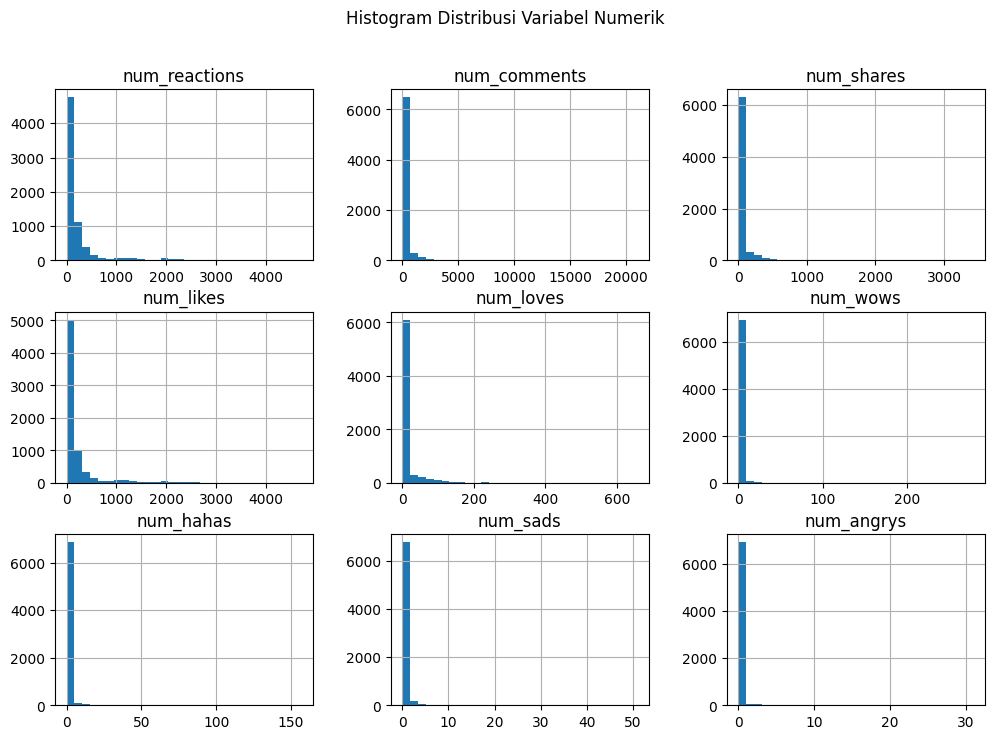


Visualisasi Distribusi Variabel Numerik (Boxplot):


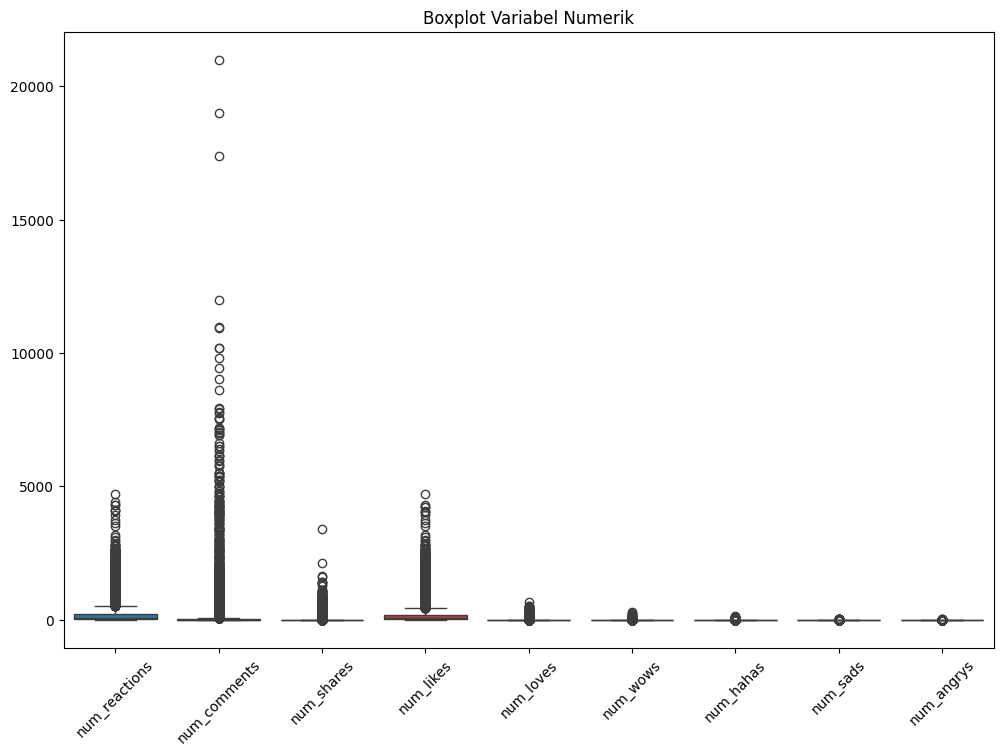


=== Analisis Hubungan Antar Variabel ===

Matriks Korelasi untuk Variabel Numerik:
               num_reactions  num_comments  num_shares  num_likes  num_loves  \
num_reactions       1.000000      0.150843    0.250723   0.994923   0.305003   
num_comments        0.150843      1.000000    0.640637   0.101687   0.521223   
num_shares          0.250723      0.640637    1.000000   0.172492   0.820000   
num_likes           0.994923      0.101687    0.172492   1.000000   0.209308   
num_loves           0.305003      0.521223    0.820000   0.209308   1.000000   
num_wows            0.267752      0.162394    0.407628   0.207800   0.508798   
num_hahas           0.176028      0.325048    0.399826   0.120784   0.507830   
num_sads            0.075138      0.236453    0.199970   0.052169   0.207600   
num_angrys          0.124326      0.225184    0.312513   0.087431   0.371001   

               num_wows  num_hahas  num_sads  num_angrys  
num_reactions  0.267752   0.176028  0.075138    0.124326

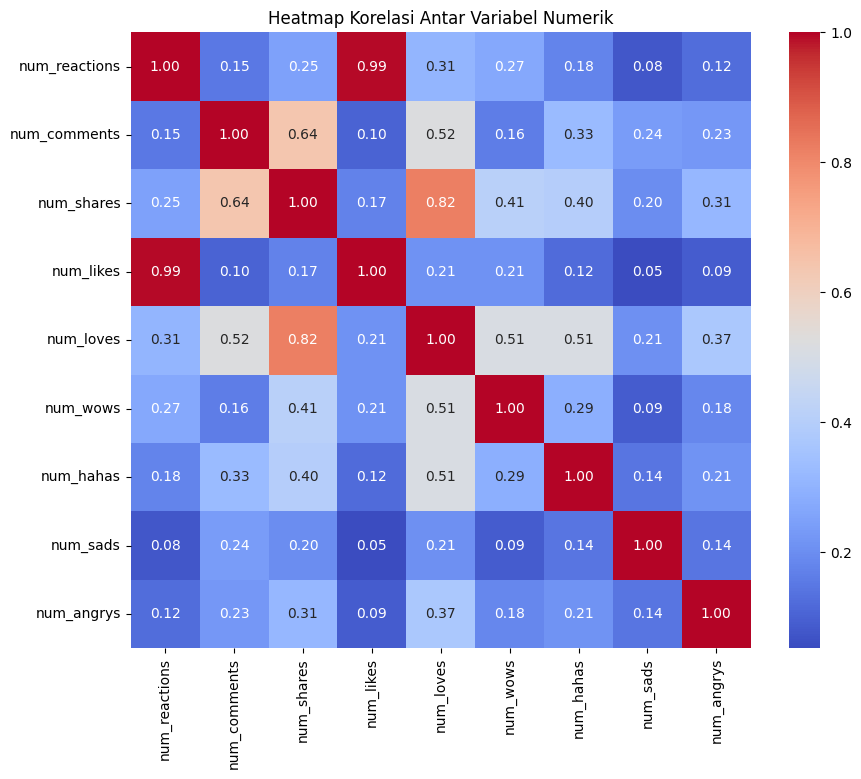

In [7]:
# Analisis Distribusi Variabel Numerik
print("=== Analisis Distribusi Variabel Numerik ===")

# Statistik deskriptif untuk variabel numerik
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
print("\nStatistik Deskriptif untuk Variabel Numerik:")
print(data[numerical_cols].describe())

# Visualisasi distribusi variabel numerik dengan histogram
print("\nVisualisasi Distribusi Variabel Numerik (Histogram):")
data[numerical_cols].hist(bins=30, figsize=(12, 8))
plt.suptitle("Histogram Distribusi Variabel Numerik")
plt.show()

# Visualisasi distribusi variabel numerik dengan boxplot
print("\nVisualisasi Distribusi Variabel Numerik (Boxplot):")
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[numerical_cols])
plt.title("Boxplot Variabel Numerik")
plt.xticks(rotation=45)
plt.show()

# Analisis Hubungan Antar Variabel
print("\n=== Analisis Hubungan Antar Variabel ===")

# Matriks korelasi untuk variabel numerik
print("\nMatriks Korelasi untuk Variabel Numerik:")
corr_matrix = data[numerical_cols].corr()
print(corr_matrix)

# Visualisasi matriks korelasi dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.show()


Diagram Batang untuk Kolom Kategorikal Terpilih:


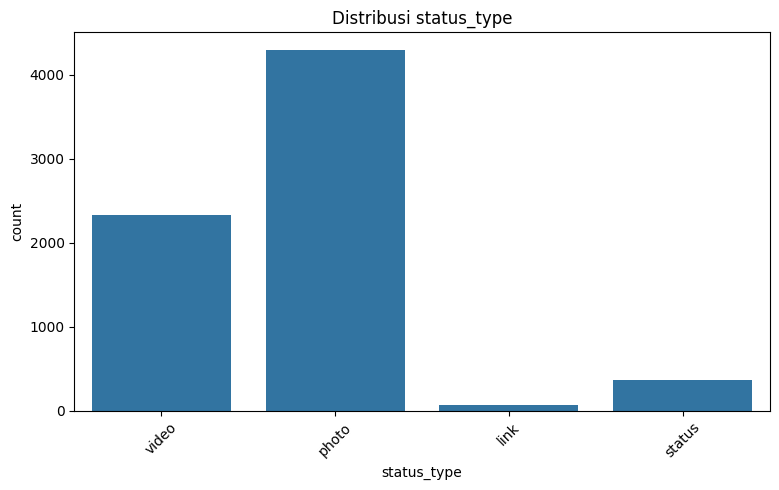

In [8]:
# Daftar kolom kategorikal yang akan divisualisasikan
categorical_cols = ['status_type']

# Hitung jumlah kolom kategorikal
n_cols = len(categorical_cols)

# Buat subplot grid
n_rows = (n_cols + 1) // 2  # Jumlah baris disesuaikan dengan jumlah kolom
fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Ratakan array axes untuk memudahkan iterasi

# Visualisasi distribusi variabel kategorikal dengan diagram batang
print("\nDiagram Batang untuk Kolom Kategorikal Terpilih:")
for i, col in enumerate(categorical_cols):
    sns.countplot(data=data, x=col, ax=axes[i])
    axes[i].set_title(f"Distribusi {col}")
    axes[i].tick_params(axis='x', rotation=45)

# Sembunyikan subplot yang tidak digunakan
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Scatter Plot untuk Hubungan Antar Variabel Numerik:


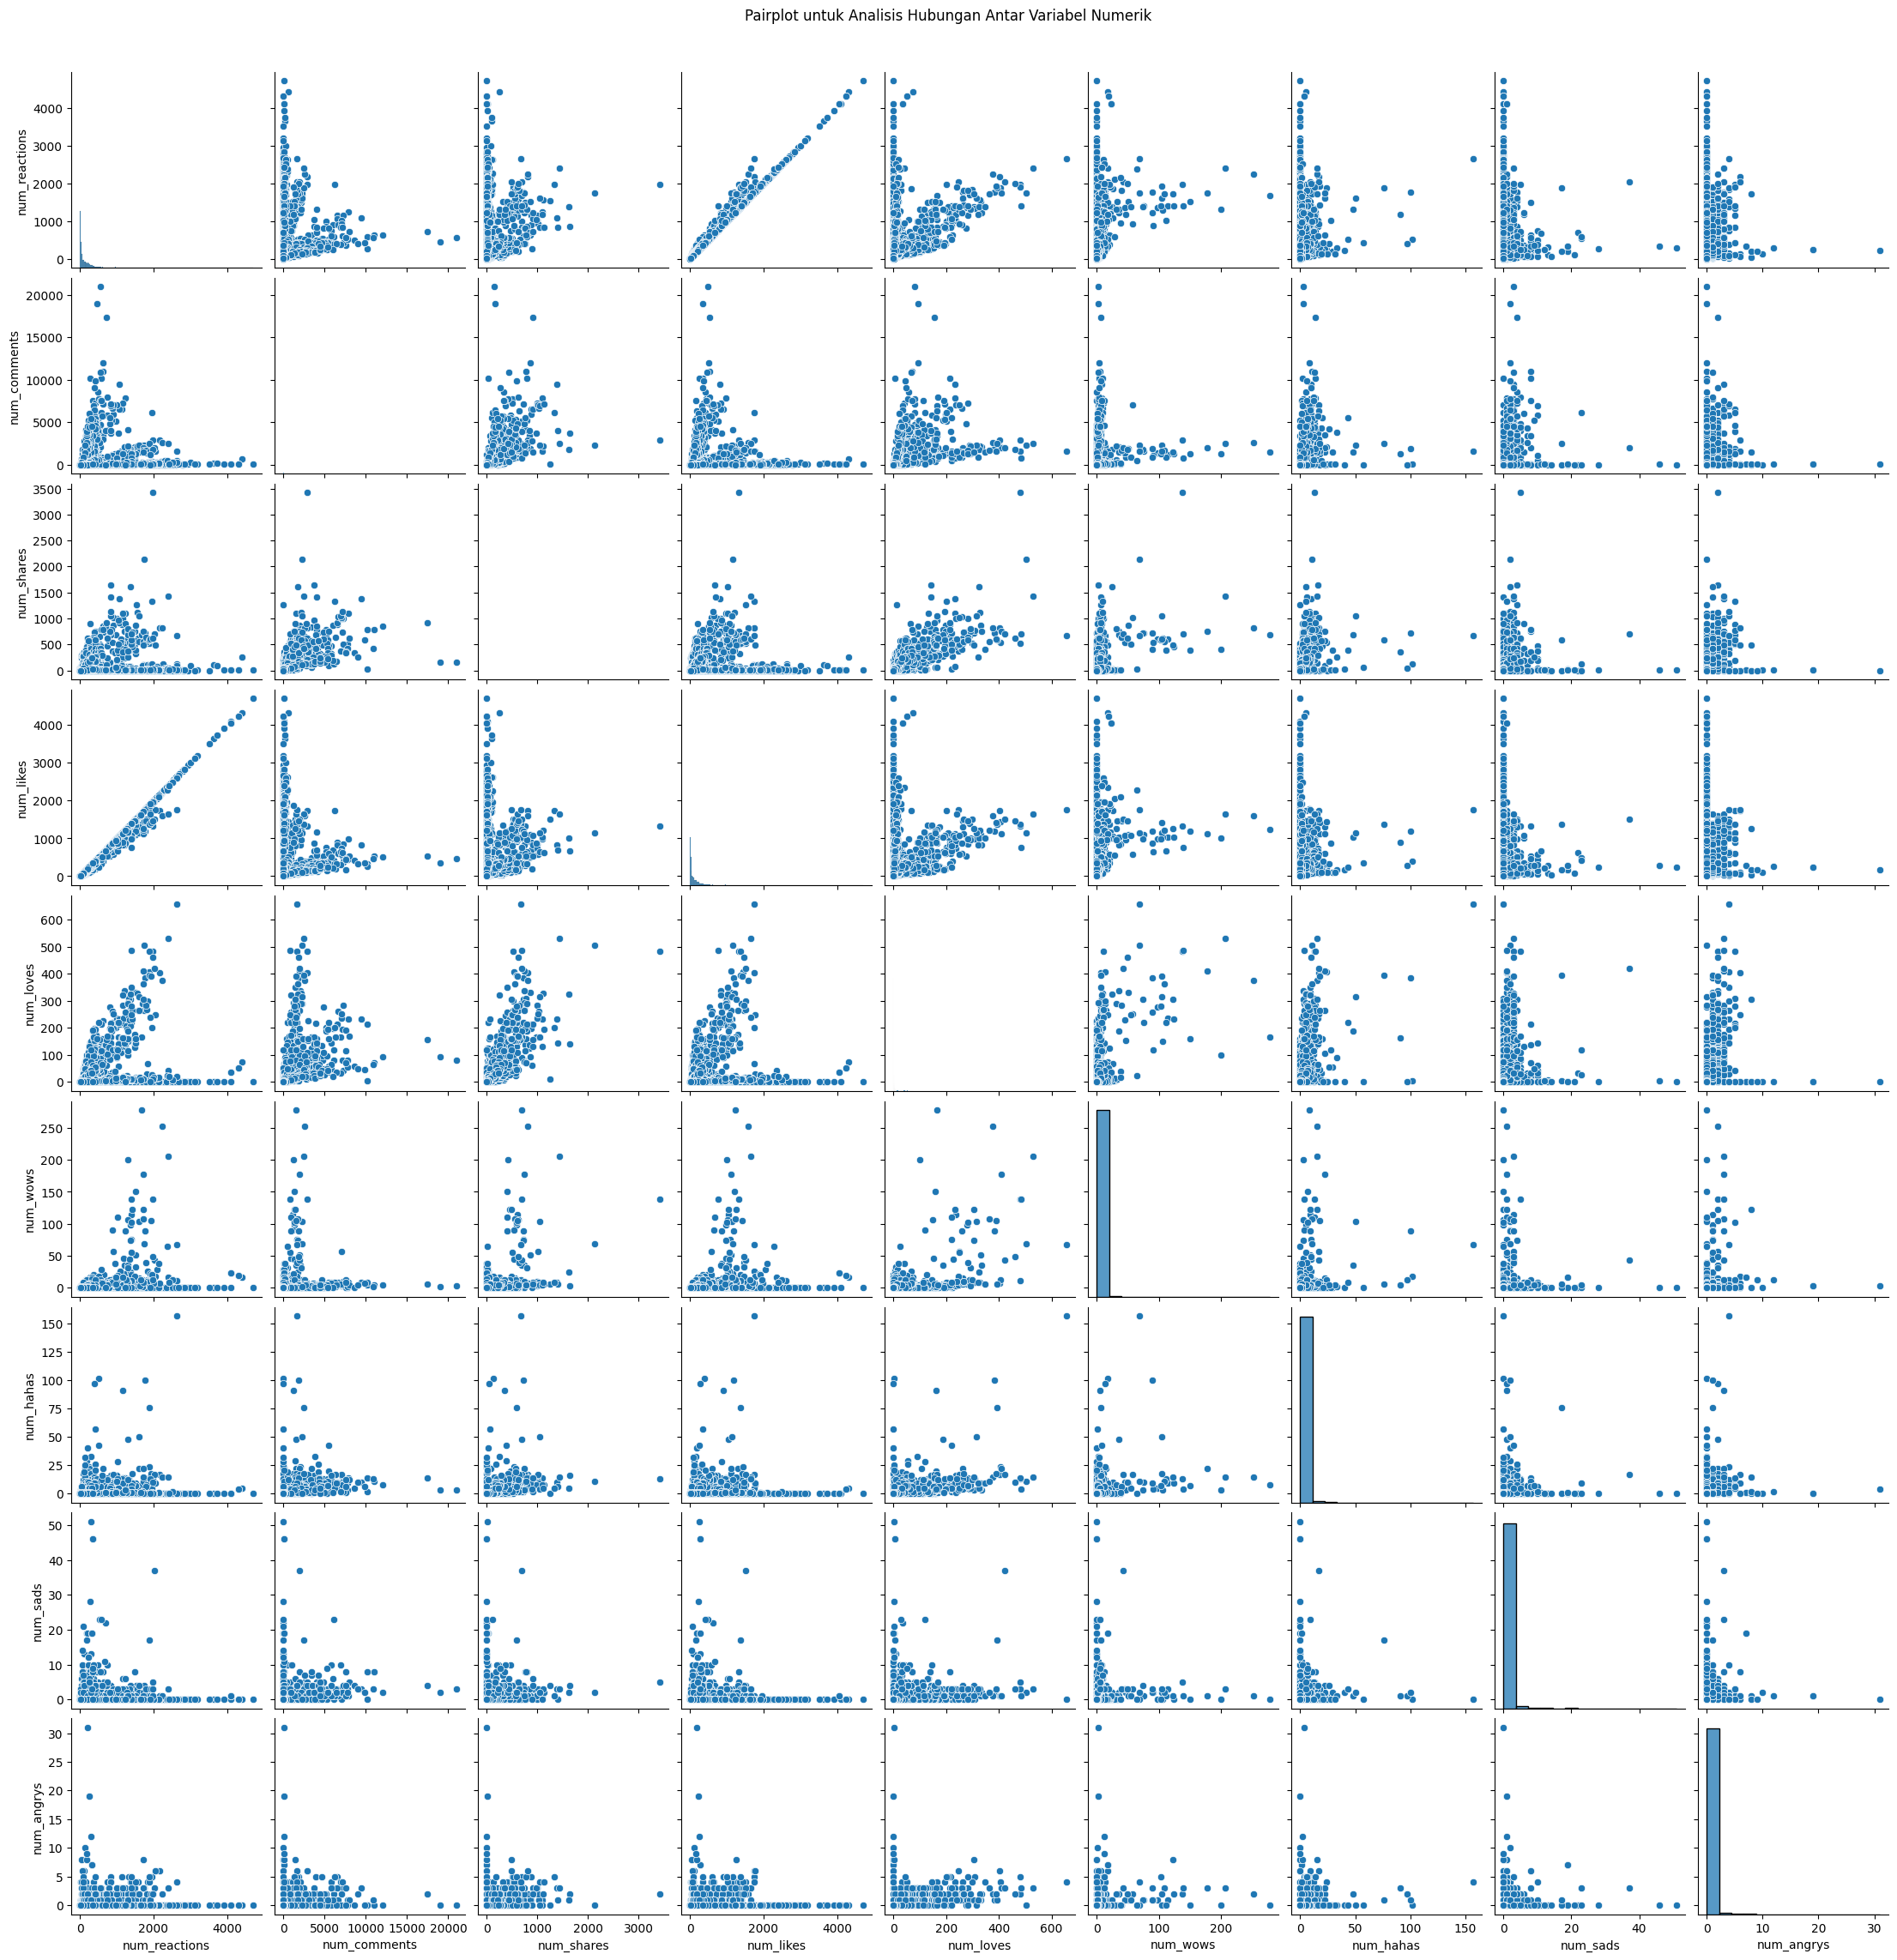

In [9]:
# Scatter plot untuk melihat hubungan antara dua variabel numerik
print("\nScatter Plot untuk Hubungan Antar Variabel Numerik:")
sns.pairplot(data[numerical_cols])
plt.suptitle("Pairplot untuk Analisis Hubungan Antar Variabel Numerik", y=1.02)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [10]:
# Drop 'status_id'
data = data.drop(columns=['status_id'])

In [11]:
# Encoding Data Kategorikal menggunakan Label Encoding
print("\n=== Encoding Data Kategorikal ===")

# Inisialisasi LabelEncoder
label_encoders = {}

# Proses encoding untuk setiap kolom kategorikal
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])  # Mengubah data kategorikal menjadi numerik
    label_encoders[col] = le  # Simpan encoder untuk nanti jika ingin inverse transform

# Gabungkan data numerik dan hasil encoding
data_processed = data[numerical_cols.tolist() + categorical_cols]  # Data sekarang berisi kolom numerik + kategorikal yang telah diencode

print("\nData setelah encoding kategorikal:")
print(data_processed.head())


=== Encoding Data Kategorikal ===

Data setelah encoding kategorikal:
   num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0            529           512         262        432         92         3   
1            150             0           0        150          0         0   
2            227           236          57        204         21         1   
3            111             0           0        111          0         0   
4            213             0           0        204          9         0   

   num_hahas  num_sads  num_angrys  status_type  
0          1         1           0            3  
1          0         0           0            1  
2          1         0           0            3  
3          0         0           0            1  
4          0         0           0            1  


In [12]:
X = data_processed
# Cek kolom yang mengandung NaN sebelum penanganan
print("Sebelum imputasi:")
print(X.isnull().sum())

# Mengisi NaN dengan mean dari setiap kolom
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Mengonversi X_imputed kembali ke DataFrame
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Cek kolom yang mengandung NaN setelah penanganan
print("\nSetelah imputasi:")
print(X_imputed_df.isnull().sum())

Sebelum imputasi:
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
status_type      0
dtype: int64

Setelah imputasi:
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
status_type      0
dtype: int64


In [13]:
# Cek dan Menghapus Data Duplikat
print("\n=== Cek Data Duplikat ===")
print(X_imputed_df.duplicated().sum())
print("\n=== Menghapus Data Duplikat ===")
X_imputed_df.drop_duplicates(inplace=True)
X_imputed_df.reset_index(drop=True, inplace=True)
print(f"Jumlah baris setelah menghapus duplikat: {len(X_imputed_df)}")


=== Cek Data Duplikat ===
2063

=== Menghapus Data Duplikat ===
Jumlah baris setelah menghapus duplikat: 4987


In [14]:
# Deteksi dan Penanganan Outlier
print("\n=== Deteksi dan Penanganan Outlier ===")

# Deteksi outlier menggunakan IQR (Interquartile Range)
for col in numerical_cols:
    Q1 = X_imputed_df[col].quantile(0.25)
    Q3 = X_imputed_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menangani outlier dengan mengganti nilai outlier dengan batas bawah/atas
    X_imputed_df[col] = np.where(
        (X_imputed_df[col] < lower_bound) | (X_imputed_df[col] > upper_bound),
        np.clip(X_imputed_df[col], lower_bound, upper_bound),  # Clip nilai ke batas bawah/atas
        X_imputed_df[col]
    )

print("\nData setelah penanganan outlier:")
print(X_imputed_df[numerical_cols].describe())


=== Deteksi dan Penanganan Outlier ===

Data setelah penanganan outlier:
       num_reactions  num_comments   num_shares    num_likes    num_loves  \
count    4987.000000   4987.000000  4987.000000  4987.000000  4987.000000   
mean      208.732304     60.129537    10.659314   184.017145     5.962202   
std       207.743507     87.871536    16.141213   181.257146     8.796419   
min         0.000000      0.000000     0.000000     0.000000     0.000000   
25%        46.000000      2.000000     0.000000    45.000000     0.000000   
50%       134.000000     10.000000     1.000000   113.000000     1.000000   
75%       292.000000     89.000000    16.000000   254.000000     9.000000   
max       661.000000    219.500000    40.000000   567.500000    22.500000   

          num_wows  num_hahas  num_sads  num_angrys  
count  4987.000000     4987.0    4987.0      4987.0  
mean      0.606076        0.0       0.0         0.0  
std       0.933014        0.0       0.0         0.0  
min       0.0000

In [15]:
# Normalisasi atau Standarisasi Fitur
print("\n=== Normalisasi atau Standarisasi Fitur ===")

# Standarisasi (mengubah distribusi data ke mean=0 dan std=1)
scaler = StandardScaler()
X_imputed_df[numerical_cols] = scaler.fit_transform(X_imputed_df[numerical_cols])

print("\nData setelah standarisasi/normalisasi:")
print(X_imputed_df[numerical_cols].head())


=== Normalisasi atau Standarisasi Fitur ===

Data setelah standarisasi/normalisasi:
   num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0       1.541804      1.813857    1.817932   1.368265   1.880249  2.030103   
1      -0.282744     -0.684358   -0.660445  -0.187692  -0.677867 -0.649655   
2       0.087943      1.813857    1.817932   0.110257   1.709708  0.422249   
3      -0.470494     -0.684358   -0.660445  -0.402878  -0.677867 -0.649655   
4       0.020545     -0.684358   -0.660445   0.110257   0.345380 -0.649655   

   num_hahas  num_sads  num_angrys  
0        0.0       0.0         0.0  
1        0.0       0.0         0.0  
2        0.0       0.0         0.0  
3        0.0       0.0         0.0  
4        0.0       0.0         0.0  


In [16]:
# Binning (Pengelompokan Data) untuk Semua Kolom Numerik
print("\n=== Binning (Pengelompokan Data) untuk Semua Kolom Numerik ===")

# Loop melalui setiap kolom numerik dan lakukan binning
for col in numerical_cols:
    # Binning menggunakan pd.cut (bisa diganti dengan pd.qcut untuk binning berdasarkan kuantil)
    data_processed[f'{col}_Bin'] = pd.cut(
        data_processed[col],
        bins=4,  # Bisa disesuaikan jumlah bins
        labels=['Low', 'Medium', 'High', 'Very High']  # Label untuk setiap bin
    )

    # Tampilkan distribusi binning
    print(f"\nDistribusi binning untuk {col}:")
    print(data_processed[f'{col}_Bin'].value_counts())


=== Binning (Pengelompokan Data) untuk Semua Kolom Numerik ===

Distribusi binning untuk num_reactions:
num_reactions_Bin
Low          6660
Medium        330
High           50
Very High      10
Name: count, dtype: int64

Distribusi binning untuk num_comments:
num_comments_Bin
Low          7001
Medium         43
High            3
Very High       3
Name: count, dtype: int64

Distribusi binning untuk num_shares:
num_shares_Bin
Low          7023
Medium         25
High            1
Very High       1
Name: count, dtype: int64

Distribusi binning untuk num_likes:
num_likes_Bin
Low          6703
Medium        291
High           46
Very High      10
Name: count, dtype: int64

Distribusi binning untuk num_loves:
num_loves_Bin
Low          6959
Medium         71
High           17
Very High       3
Name: count, dtype: int64

Distribusi binning untuk num_wows:
num_wows_Bin
Low          7027
Medium         17
High            4
Very High       2
Name: count, dtype: int64

Distribusi binning untuk nu

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [17]:
X_imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4987 entries, 0 to 4986
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num_reactions  4987 non-null   float64
 1   num_comments   4987 non-null   float64
 2   num_shares     4987 non-null   float64
 3   num_likes      4987 non-null   float64
 4   num_loves      4987 non-null   float64
 5   num_wows       4987 non-null   float64
 6   num_hahas      4987 non-null   float64
 7   num_sads       4987 non-null   float64
 8   num_angrys     4987 non-null   float64
 9   status_type    4987 non-null   float64
dtypes: float64(10)
memory usage: 389.7 KB


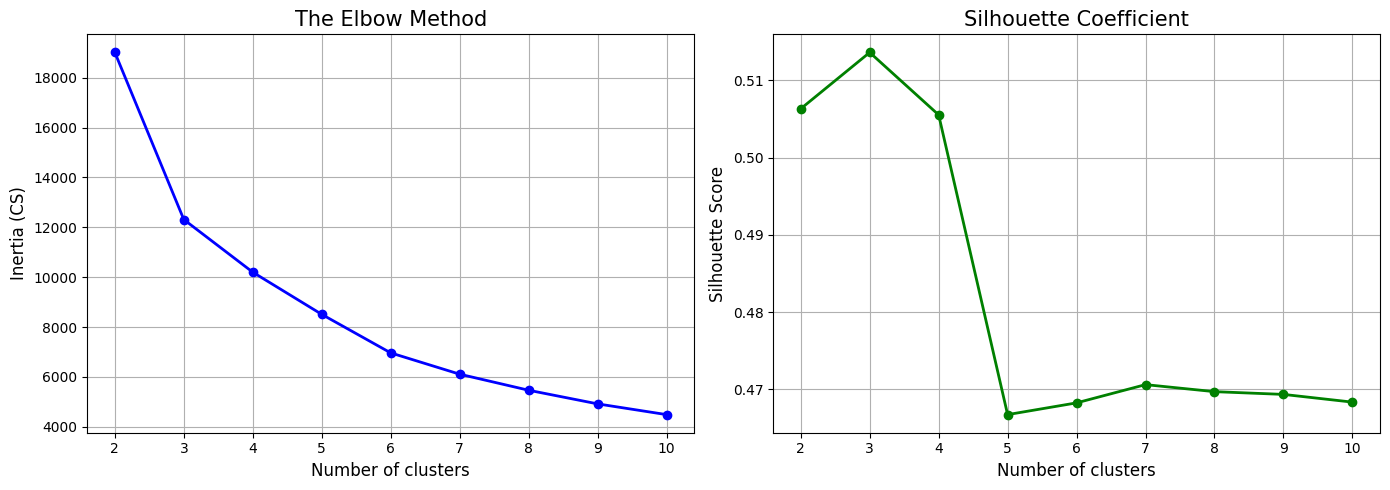

In [18]:
X = X_imputed_df

# Identifying Optimal K Value
cs = []
silhouette_coefficients = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
    silhouette_coefficients.append(silhouette_score(X, kmeans.labels_))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Elbow Method plot
axes[0].plot(range(2, 11), cs, marker='o', linestyle='-', color='b', linewidth=2)
axes[0].set_title('The Elbow Method', fontsize=15)
axes[0].set_xlabel('Number of clusters', fontsize=12)
axes[0].set_ylabel('Inertia (CS)', fontsize=12)
axes[0].grid(True)

# Silhouette Score plot
axes[1].plot(range(2, 11), silhouette_coefficients, marker='o', linestyle='-', color='g', linewidth=2)
axes[1].set_title('Silhouette Coefficient', fontsize=15)
axes[1].set_xlabel('Number of clusters', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [19]:
# Definisikan range jumlah cluster yang ingin diuji
k_range = range(2, 11)

# Inisialisasi list untuk menyimpan Silhouette Score
silhouette_scores = []

# Loop untuk menghitung Silhouette Score pada setiap jumlah cluster
for k in k_range:
    # Inisialisasi KMeans dengan jumlah cluster saat ini
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Fit model dan prediksi cluster
    labels = kmeans.fit_predict(X)

    # Hitung Silhouette Score
    score = silhouette_score(X, labels)

    # Simpan score ke dalam list
    silhouette_scores.append(score)
    print(f"Silhouette Score untuk k={k}: {score:.4f}")

Silhouette Score untuk k=2: 0.5063
Silhouette Score untuk k=3: 0.5136
Silhouette Score untuk k=4: 0.5055
Silhouette Score untuk k=5: 0.4963
Silhouette Score untuk k=6: 0.4680
Silhouette Score untuk k=7: 0.4702
Silhouette Score untuk k=8: 0.4537
Silhouette Score untuk k=9: 0.4696
Silhouette Score untuk k=10: 0.4564


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

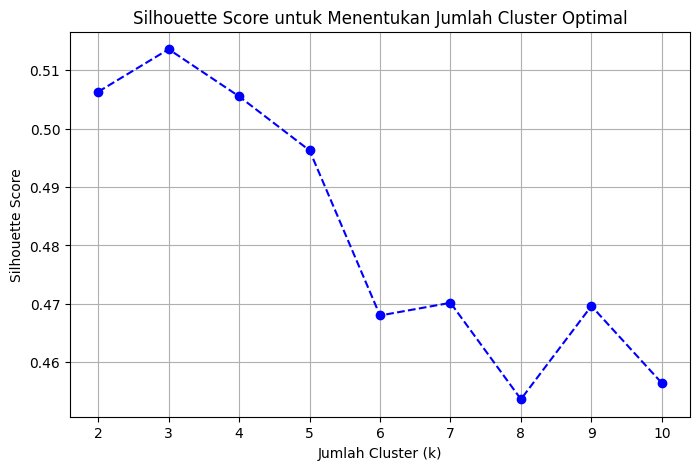


Jumlah cluster optimal berdasarkan Silhouette Score: 3


In [20]:
# Plot hasil Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--', color='b')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Menentukan Jumlah Cluster Optimal')
plt.grid(True)  # Menambahkan grid untuk memudahkan pembacaan
plt.xticks(k_range)  # Memastikan sumbu x menampilkan semua nilai k yang diuji
plt.show()

# Menampilkan jumlah cluster optimal berdasarkan Silhouette Score tertinggi
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"\nJumlah cluster optimal berdasarkan Silhouette Score: {optimal_k}")

In [21]:
# Latih Model K-Means dengan Jumlah Cluster Optimal
print("\n=== Latih Model K-Means dengan Jumlah Cluster Optimal ===")

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X)


=== Latih Model K-Means dengan Jumlah Cluster Optimal ===


In [22]:
# Evaluasi Model Sebelum Feature Selection
print("=== Evaluasi Model Sebelum Feature Selection ===")

# Latih model K-Means dengan semua fitur
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
kmeans_score = silhouette_score(X, kmeans_labels)
print(f"Silhouette Score sebelum feature selection: {kmeans_score:.2f}")

=== Evaluasi Model Sebelum Feature Selection ===
Silhouette Score sebelum feature selection: 0.51


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [23]:
# Feature Selection
print("\n=== Feature Selection ===")

# Gunakan SelectKBest untuk memilih fitur terbaik
selector = SelectKBest(score_func=mutual_info_classif, k=2)  # Pilih n fitur terbaik
X_selected = selector.fit_transform(X, kmeans_labels)  # Gunakan label clustering sebagai target

# Dapatkan nama fitur terpilih
selected_features = X.columns[selector.get_support()]
print("Fitur terpilih setelah feature selection:", selected_features)


=== Feature Selection ===
Fitur terpilih setelah feature selection: Index(['num_reactions', 'num_comments'], dtype='object')



=== Evaluasi Model Setelah Feature Selection ===
Silhouette Score setelah feature selection: 0.70


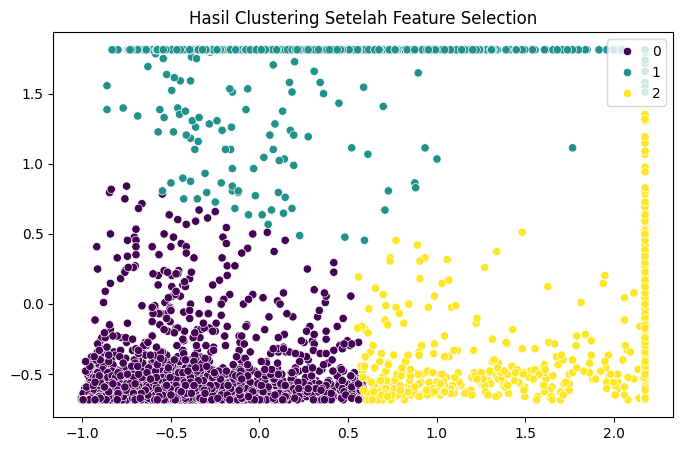

In [24]:
# Evaluasi Model Setelah Feature Selection
print("\n=== Evaluasi Model Setelah Feature Selection ===")

# Latih model K-Means dengan fitur terpilih
kmeans_selected = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels_selected = kmeans_selected.fit_predict(X_selected)
kmeans_score_selected = silhouette_score(X_selected, kmeans_labels_selected)
print(f"Silhouette Score setelah feature selection: {kmeans_score_selected:.2f}")

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_selected[:, 0], y=X_selected[:, 1], hue=kmeans_labels_selected, palette='viridis')
plt.title("Hasil Clustering Setelah Feature Selection")
plt.legend(loc= 'upper right')
plt.show()

In [25]:
# Bandingkan Performa Model Sebelum dan Sesudah Feature Selection
print("\n=== Perbandingan Performa Model ===")
print(f"Silhouette Score sebelum feature selection: {kmeans_score:.2f}")
print(f"Silhouette Score setelah feature selection: {kmeans_score_selected:.2f}")

if kmeans_score_selected > kmeans_score:
    print("Feature selection meningkatkan performa model.")
else:
    print("Feature selection tidak meningkatkan performa model.")


=== Perbandingan Performa Model ===
Silhouette Score sebelum feature selection: 0.51
Silhouette Score setelah feature selection: 0.70
Feature selection meningkatkan performa model.


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [26]:
# Salin data asli dan tambahkan kolom cluster dengan NaN
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = np.nan

In [27]:
# index mapping
index_mapping = X_imputed_df.index

for i, label in enumerate(kmeans_labels_selected):
    # Check if index is within bounds
    if i < len(index_mapping):
        data_with_clusters.loc[index_mapping[i], 'Cluster'] = label
    else:
        print(f"Warning: Index {i} out of bounds for index_mapping")

# Hapus data yang tidak memiliki cluster (jika ada)
data_with_clusters.dropna(subset=['Cluster'], inplace=True)

# Konversi cluster ke tipe integer agar mudah dianalisis
data_with_clusters['Cluster'] = data_with_clusters['Cluster'].astype(int)

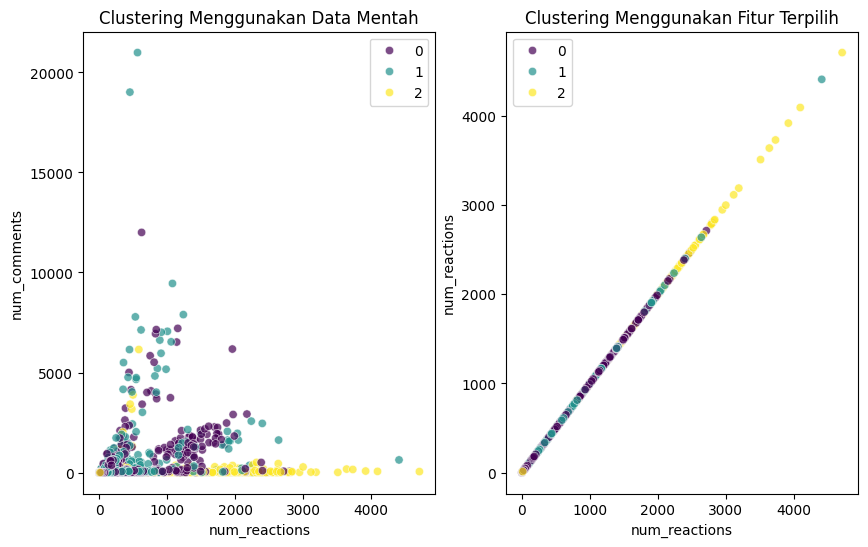

In [28]:
# Tentukan fitur numerik yang ada
numeric_selected_features = [f for f in selected_features if f in data_with_clusters.columns and data_with_clusters[f].dtype in ['int64', 'float64']]

# Visualisasi cluster menggunakan data asli (bukan hasil standarisasi)
plt.figure(figsize=(10, 6))

# Pastikan fitur yang digunakan tersedia
feature_x = selected_features[0] if len(selected_features) > 0 else data_with_clusters.columns[0]
feature_y = selected_features[1] if len(selected_features) > 1 else data_with_clusters.columns[1]

# Use data_with_clusters for plotting to ensure consistent lengths
plt.subplot(1, 2, 1)
sns.scatterplot(x=data_with_clusters[feature_x], y=data_with_clusters[feature_y], hue=kmeans_labels_selected, palette='viridis', alpha=0.7, edgecolor='w')
plt.title("Clustering Menggunakan Data Mentah")

plt.subplot(1, 2, 2)
# Adjust the feature selection for the second plot if needed
feature_z = selected_features[2] if len(selected_features) > 2 else data_with_clusters.columns[2]
sns.scatterplot(x=data_with_clusters[feature_x], y=data_with_clusters[feature_z],
                hue=kmeans_labels_selected, palette='viridis', alpha=0.7, edgecolor='w')
plt.title("Clustering Menggunakan Fitur Terpilih")
plt.show()

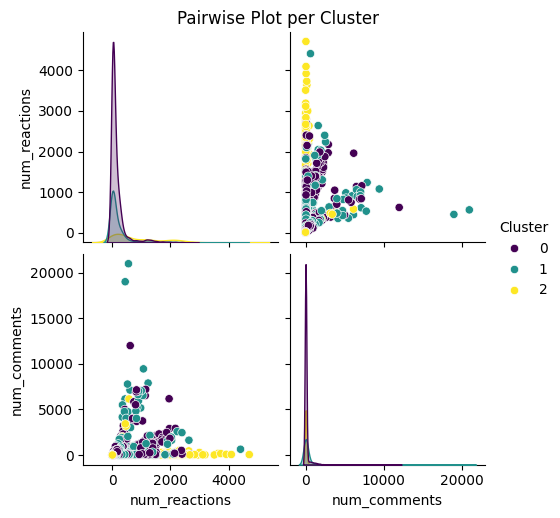

In [29]:
# Visualisasi tambahan
numeric_selected_features = [f for f in selected_features if data_with_clusters[f].dtype in ['int64', 'float64']]
sns.pairplot(data_with_clusters, hue='Cluster', palette='viridis', vars=numeric_selected_features)
plt.suptitle('Pairwise Plot per Cluster', y=1.02)
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

<ipython-input-30-a2476caac6cb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=data_with_clusters, palette='viridis')


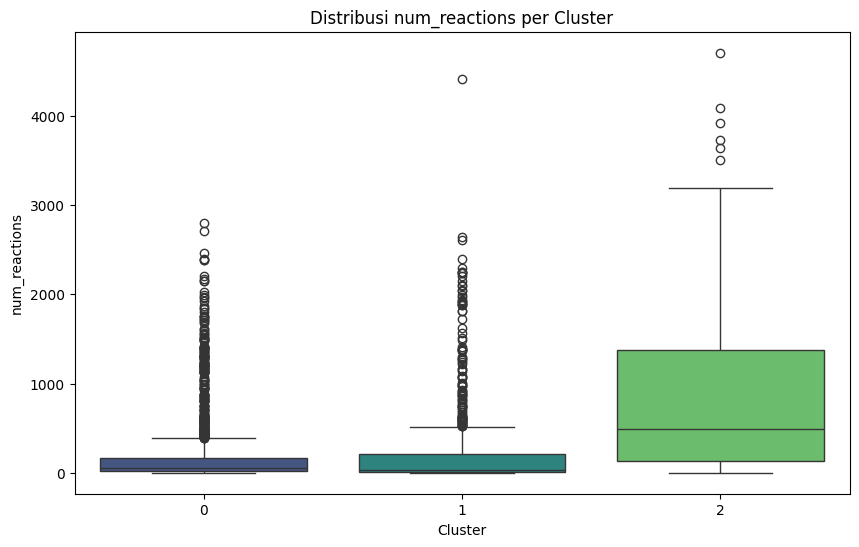

<ipython-input-30-a2476caac6cb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=data_with_clusters, palette='viridis')


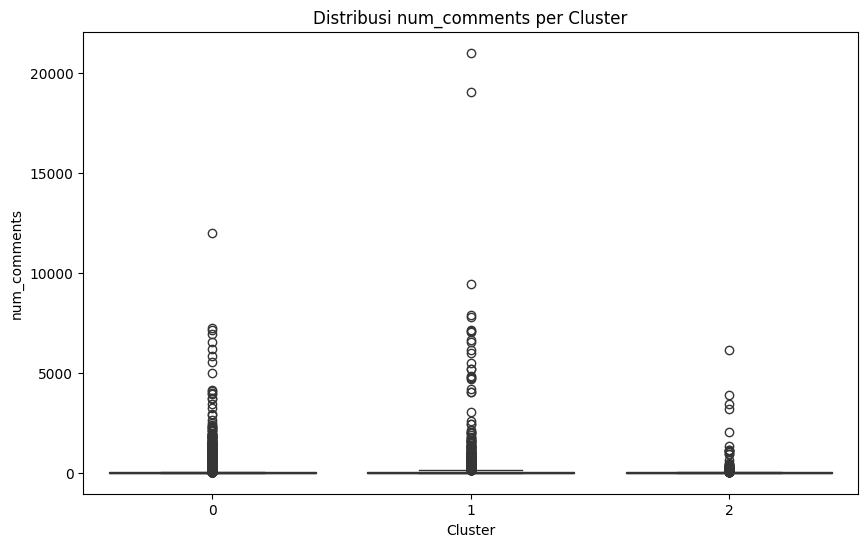

In [30]:
# Visualisasi distribusi fitur numerik dalam tiap cluster
for feature in numeric_selected_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=data_with_clusters, palette='viridis')
    plt.title(f'Distribusi {feature} per Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

In [31]:
# Analisis karakteristik cluster
print("\n=== Analisis Karakteristik Cluster ===")
for cluster in range(optimal_k):
    print(f"\nCluster {cluster}:")
    cluster_data = data_with_clusters[data_with_clusters['Cluster'] == cluster]
    print(cluster_data[numeric_selected_features].mean().round(2))

# Analisis ukuran cluster
cluster_sizes = data_with_clusters['Cluster'].value_counts().sort_index()
print("\nJumlah data per cluster:")
print(cluster_sizes)

# Analisis statistik deskriptif per cluster
cluster_stats = data_with_clusters.groupby('Cluster')[numeric_selected_features].mean().round(2)
print("\nRata-rata nilai fitur per cluster:")
print(cluster_stats)

# Analisis untuk K-Means
print("\nAnalisis Karakteristik Cluster (K-Means):")
for cluster in range(optimal_k):
    print(f"\nCluster {cluster}:")
    cluster_data = data_with_clusters[data_with_clusters['Cluster'] == cluster]
    print(cluster_data[numeric_selected_features].mean())

# Hubungan dengan konteks bisnis
print("\n=== Interpretasi Hasil Clustering ===")
for cluster in cluster_stats.index:
    print(f"\nKarakteristik Cluster {cluster}:")
    for feature in numeric_selected_features:
        print(f"- Rata-rata {feature}: {cluster_stats.loc[cluster, feature]:.2f}")

    # Hubungkan dengan interpretasi nyata (pastikan fitur yang digunakan ada dalam dataset)
    if 'num_comments' in numeric_selected_features:
        # Menentukan tingkatan jumlah komentar berdasarkan kuantil
        comment_quantiles = data_with_clusters['num_comments'].quantile([0.33, 0.66])

        if cluster_stats.loc[cluster, 'num_comments'] > comment_quantiles[0.66]:
            comment_level = 'Tinggi'
        elif cluster_stats.loc[cluster, 'num_comments'] > comment_quantiles[0.33]:
            comment_level = 'Sedang'
        else:
            comment_level = 'Rendah'

        comment_info = f"- Rata-rata jumlah komentar: {comment_level}"
        print(comment_info)

    if 'num_reactions' in numeric_selected_features:
        # Menentukan tingkatan engagement berdasarkan kuantil
        reaction_quantiles = data_with_clusters['num_reactions'].quantile([0.33, 0.66])

        if cluster_stats.loc[cluster, 'num_reactions'] > reaction_quantiles[0.66]:
            reaction_level = 'Tinggi'
        elif cluster_stats.loc[cluster, 'num_reactions'] > reaction_quantiles[0.33]:
            reaction_level = 'Sedang'
        else:
            reaction_level = 'Rendah'

        reaction_info = f"- Engagement rata-rata: {reaction_level}"
        print(reaction_info)

    print(f"- Jumlah data: {cluster_sizes[cluster]} data")


=== Analisis Karakteristik Cluster ===

Cluster 0:
num_reactions    154.86
num_comments     103.69
dtype: float64

Cluster 1:
num_reactions    185.00
num_comments     265.22
dtype: float64

Cluster 2:
num_reactions    847.06
num_comments      61.54
dtype: float64

Jumlah data per cluster:
Cluster
0    3078
1    1168
2     741
Name: count, dtype: int64

Rata-rata nilai fitur per cluster:
         num_reactions  num_comments
Cluster                             
0               154.86        103.69
1               185.00        265.22
2               847.06         61.54

Analisis Karakteristik Cluster (K-Means):

Cluster 0:
num_reactions    154.860299
num_comments     103.694282
dtype: float64

Cluster 1:
num_reactions    185.000856
num_comments     265.220034
dtype: float64

Cluster 2:
num_reactions    847.063428
num_comments      61.543860
dtype: float64

=== Interpretasi Hasil Clustering ===

Karakteristik Cluster 0:
- Rata-rata num_reactions: 154.86
- Rata-rata num_comments: 103.69


**Cluster 0: Engagement Stabil dengan Komentar Relatif Tinggi**

- Karakteristik:
  1. Rata-rata num_reactions: 154.86
  2. Rata-rata num_comments: 103.69
  3. Jumlah data: 3078
  4. Pola engagement:
    - Jumlah komentar yang cukup tinggi dibandingkan jumlah reaksi.
    - Audiens cenderung memberikan respons dalam bentuk komentar, meskipun tidak terlalu banyak memberikan reaksi seperti likes atau loves.
    - Konten dalam cluster ini tampaknya cukup menarik untuk berdiskusi, tetapi kurang menarik secara emosional untuk mendapatkan banyak reaksi.

- Interpretasi Bisnis: Cluster ini terdiri dari konten yang mampu mendorong diskusi, meskipun tidak banyak mendapatkan reaksi dalam bentuk likes atau loves. Hal ini mengindikasikan bahwa audiens tertarik dengan isi konten dan merasa perlu memberikan opini atau komentar.

- Rekomendasi Bisnis:

   1. Perkuat interaksi dengan audiens:

  - Gunakan pertanyaan terbuka atau ajakan diskusi yang lebih eksplisit dalam konten untuk mendorong lebih banyak komentar.
  - Respon cepat terhadap komentar agar percakapan terus berjalan dan meningkatkan engagement rate.
  2. Tingkatkan elemen visual atau storytelling:

    - Jika memungkinkan, tambahkan elemen visual seperti gambar atau video untuk menarik lebih banyak reaksi.
    - Eksperimen dengan format konten yang lebih emosional atau persuasif untuk meningkatkan jumlah likes.


**Cluster 1: Engagement Tinggi dengan Dominasi Komentar**

- Karakteristik:

  1. Rata-rata num_reactions: 185.00
  2. Rata-rata num_comments: 265.22
  3. Jumlah data: 1168
  4. Pola engagement:
    - Jumlah komentar sangat tinggi, lebih tinggi dibandingkan dua cluster lainnya.
    - Audiens cenderung lebih aktif dalam berdiskusi dan berinteraksi dengan konten.
    - Konten ini tampaknya sangat efektif dalam memancing opini, perdebatan, atau keterlibatan aktif dari audiens.

- Interpretasi Bisnis:
Konten dalam cluster ini mendapatkan perhatian yang cukup besar dari audiens, terutama dalam bentuk komentar. Hal ini bisa disebabkan oleh konten yang memancing diskusi, kontroversial, atau memiliki elemen interaktif yang kuat.

- Rekomendasi Bisnis:
  1. Fokus pada strategi yang mempertahankan tingkat komentar tinggi:

    - Buat konten yang lebih interaktif, seperti polling, pertanyaan terbuka, atau tantangan yang mendorong audiens untuk berbagi pengalaman.
    - Manfaatkan user-generated content dengan mengajak audiens untuk berbagi cerita atau pendapat mereka.

  2. Ubah sebagian interaksi menjadi aksi konkret:

    - Jika tujuan bisnis adalah meningkatkan konversi (sales, pendaftaran, atau partisipasi dalam suatu acara), gunakan ajakan bertindak (call-to-action) yang lebih jelas dalam konten.
    - Misalnya, setelah mendapatkan banyak komentar, ajak audiens untuk melakukan langkah selanjutnya seperti mengunjungi situs web atau mendaftar layanan.
  
**Cluster 2: Reaksi Sangat Tinggi, tetapi Komentar Rendah**

- Karakteristik:

    1. Rata-rata num_reactions: 847.06
    2. Rata-rata num_comments: 61.54
    3. Jumlah data: 741
    4. Pola engagement:
      - Cluster ini memiliki jumlah reaksi tertinggi, tetapi jumlah komentarnya paling rendah dibandingkan dua cluster lainnya.
      - Audiens lebih banyak memberikan respons pasif (misalnya likes, loves, atau wows), tetapi tidak banyak berpartisipasi dalam diskusi.
      - Kemungkinan besar, konten dalam cluster ini sangat menarik secara visual atau emosional, tetapi tidak cukup memicu percakapan.

- Interpretasi Bisnis: Konten dalam cluster ini berhasil menarik perhatian audiens, tetapi hanya dalam bentuk reaksi, bukan komentar. Hal ini bisa terjadi jika kontennya berupa sesuatu yang mudah dipahami secara sekilas (one-shot content), seperti gambar menarik, meme, atau konten inspiratif.

- Rekomendasi Bisnis:
  1. Dorong lebih banyak interaksi aktif:

    - Gunakan ajakan bertanya dalam deskripsi atau caption untuk memancing audiens agar meninggalkan komentar.
    - Misalnya, tambahkan pertanyaan seperti "Apakah kamu pernah mengalami hal seperti ini? Ceritakan di kolom komentar!"

  2. Gunakan kombinasi antara visual dan narasi yang kuat:

    - Jika kontennya berbasis gambar, pertimbangkan untuk menambahkan teks yang lebih menarik atau memberikan konteks cerita yang mendorong diskusi.
    - Jika memungkinkan, gunakan format konten carousel atau video pendek untuk meningkatkan interaksi yang lebih mendalam.

**Kesimpulan Umum**

Hasil clustering menunjukkan bahwa meskipun ketiga cluster menunjukkan engagement yang tinggi, masing-masing memiliki karakteristik yang berbeda dalam hal format konten dan cara audiens berinteraksi.

Cluster 0 memiliki tingkat diskusi yang cukup tinggi, tetapi kurang dalam jumlah reaksi.
Strategi: Tambahkan elemen visual dan perkuat ajakan diskusi. Cluster 1 dengan engagement tertinggi dalam bentuk komentar, menunjukkan bahwa kontennya sangat memancing diskusi.
Strategi: Gunakan format interaktif dan arahkan komentar ke tindakan nyata (call-to-action). Cluster 2 memiliki jumlah reaksi tertinggi, tetapi sedikit komentar.
Strategi: Tambahkan pertanyaan atau ajakan untuk berkomentar guna meningkatkan interaksi aktif.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [32]:
# simpan hasil clustering
data_with_clusters = X.copy()  # Salin data asli
data_with_clusters['Cluster'] = kmeans_labels_selected  # Tambahkan kolom cluster

data_with_clusters.to_csv('hasil_clustering.csv', index=False)
print("Data hasil clustering telah disimpan ke 'hasil_clustering.csv'.")

Data hasil clustering telah disimpan ke 'hasil_clustering.csv'.


In [33]:
cek = pd.read_csv('/content/hasil_clustering.csv')
cek.head(30)

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type,Cluster
0,1.541804,1.813857,1.817932,1.368265,1.880249,2.030103,0.0,0.0,0.0,3.0,1
1,-0.282744,-0.684358,-0.660445,-0.187692,-0.677867,-0.649655,0.0,0.0,0.0,1.0,0
2,0.087943,1.813857,1.817932,0.110257,1.709708,0.422249,0.0,0.0,0.0,3.0,1
3,-0.470494,-0.684358,-0.660445,-0.402878,-0.677867,-0.649655,0.0,0.0,0.0,1.0,0
4,0.020545,-0.684358,-0.660445,0.110257,0.345380,-0.649655,0.0,0.0,0.0,1.0,0
5,0.039802,-0.616069,-0.660445,0.148880,-0.109397,0.422249,0.0,0.0,0.0,1.0,0
6,1.416637,1.813857,1.817932,1.291018,1.880249,2.030103,0.0,0.0,0.0,3.0,1
7,0.415302,1.813857,1.817932,0.419241,1.880249,0.422249,0.0,0.0,0.0,3.0,1
8,-0.027596,-0.672976,-0.660445,0.077151,-0.109397,-0.649655,0.0,0.0,0.0,1.0,0
9,-0.186462,-0.581925,-0.598486,-0.093893,-0.336785,-0.649655,0.0,0.0,0.0,1.0,0


In [34]:
# Simpan model K-Means
dump(kmeans_selected, 'kmeans_model.joblib')
print("Model K-Means telah disimpan ke 'kmeans_model.joblib'.")

Model K-Means telah disimpan ke 'kmeans_model.joblib'.
